In [1]:
from skimage.morphology import watershed
from skimage.feature import peak_local_max
import trackpy as tp
import matplotlib.pyplot as plt
import numpy as np
_numba=True
# massa=2800

dist=50
memoria=2
stub=7

%matplotlib qt5

In [2]:
import pims
# ficheiro = "/run/media/jmamede/Joao/till/fixed40x/prj/WellB03_Channela647,mRuby,GFP,DAPI_Se/q0007_v7_PRJ.ome.tiff"
ficheiro = "/media/jmamede/Joao/Stephanie/20220214VOGmelitinTriton/deco/iGFP/B4-MaxIP_v6.tif"

In [3]:
reader = pims.bioformats.BioformatsReader(ficheiro,java_memory='1024m')

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:408: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


In [4]:
reader

<FramesSequenceND>
Axes: 3
Axis 'x' size: 2048
Axis 'y' size: 2048
Axis 't' size: 3
Pixel Datatype: <f4

Frame([[ 505.68588,  497.62778,  493.31592, ...,  701.8252 ,  658.92633,
         654.1302 ],
       [ 507.5384 ,  488.81436,  535.17694, ...,  675.1039 ,  612.89453,
         602.0808 ],
       [ 608.1163 ,  682.66254,  613.0488 , ...,  578.3483 ,  620.6919 ,
         739.5105 ],
       ...,
       [ 576.8857 ,  713.1709 ,  815.55005, ...,  865.54895,  845.5148 ,
        1034.3684 ],
       [ 574.3667 ,  690.2269 ,  708.3101 , ...,  446.53723,  472.92285,
         469.1966 ],
       [ 529.7265 ,  523.6376 ,  497.8272 , ...,  446.53723,  446.53723,
         446.53723]], dtype=float32)
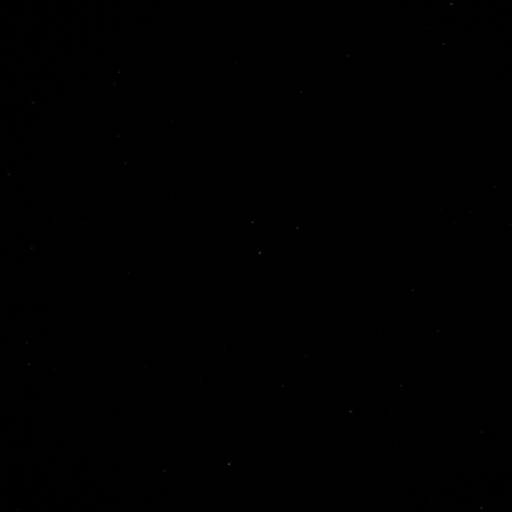

In [7]:

reader.bundle_axes = 'yx'
reader.iter_axes = 't'
reader[0]

In [8]:
reader.metadata.ChannelCount(0)

1

In [9]:
reader.bundle_axes = 'yx'
reader.iter_axes = 't'
# print(reader.metadata.ChannelID)
for i in range(int(reader.metadata.ChannelCount(0))):
    print(i,reader.metadata.ChannelID(0,i))
%matplotlib qt5

0 Channel:0:0


In [10]:
i=2
plt.imshow(reader[i],vmax=np.max(reader[i]),vmin=np.min(reader[i]))
reader.metadata.ChannelCount(0)
labels_img = np.zeros((reader.metadata.ChannelCount(0),)+reader.frame_shape)
labels_img.shape

(1, 2048, 2048)

In [15]:
i=2
#EMCCD
#ruby ag3
# minmass=350
#gfp
minmass=450

#sCMOS
# minmass= 300

#sCMOS
# tamanho=7
#EMCCD
tamanho=5

f = tp.locate(reader[i],tamanho,minmass=minmass,engine='numba') 
a = list(zip(f.y,f.x))
tp.annotate(f, reader[i], imshow_style={'cmap':'gray','vmax': np.mean(reader[i])*3, 'vmin': np.min(reader[i])});
print(f)

                 y            x         mass      size       ecc      signal  \
4         2.818182   489.848485   564.761679  1.141504  0.199451  102.683942   
10        3.733333  1033.783333  1026.839416  1.204159  0.215407  171.139903   
21        6.071429   790.261905   718.787592  1.112697  0.357810  136.911922   
27        8.222222   202.888889   616.103650  1.130388  0.097532  119.797932   
33        9.812500   648.906250   547.647689  1.159202  0.486504  102.683942   
...            ...          ...          ...       ...       ...         ...   
21069  2040.370370  1736.777778   462.077737  1.154701  0.244780   85.569951   
21073  2041.031746   183.222222  1078.181387  1.054093  0.367913  239.595864   
21079  2040.709677   877.645161   530.533699  1.191367  0.120000  102.683942   
21084  2041.827586    54.827586   496.305718  1.144703  0.266797   85.569951   
21089  2042.071429  1430.857143   479.191728  1.133893  0.592655  102.683942   

          raw_mass        ep  frame  
4

In [17]:
i=5
#EMCCD
#ruby ag3
# minmass=350
#gfp
minmass=500

#sCMOS
# minmass= 300

#sCMOS
# tamanho=7
#EMCCD
tamanho=5

f = tp.locate(reader[i],tamanho,minmass=minmass,engine='numba') 
a = list(zip(f.y,f.x))
tp.annotate(f, reader[i], imshow_style={'cmap':'gray','vmax': np.max(reader[i])/5, 'vmin': np.min(reader[i])});
print(f)

IndexError: index out of range

In [171]:
import sys
sys.path.insert(0,'/home/jmamede/scripts')
from support_pla import othercolor, cell_mask, multiply,  make_labels_trackpy

metadata = reader.metadata
coords = ['','','']
labels_img = np.zeros((metadata.ChannelCount(0),)+reader.frame_shape)
# coords = np.zeros((metadata.ChannelCount(0)))
list_tresholds = [600,300,300]
for i in range(metadata.ChannelCount(0)):
    labels_img[i,:,:],coords[i] = make_labels_trackpy(reader[i],mass=list_tresholds[i],size=5,_numba=True)

In [174]:
# b = tp.masks.mask_image(a,reader[i],3.5)

# plt.imshow(reader[i],cmap='gray')
# plt.imshow(b, cmap='jet', alpha=0.5)                 
coords[2]

array([[   2,  697],
       [   2,  744],
       [   3,  431],
       ...,
       [1020,  447],
       [1020,  845],
       [1020,  895]])

In [158]:
plt.imshow(labels_img[2])

In [118]:
plt.imshow(tp.masks.mask_image(f,reader[2],3))


(2044, 2048)